<>:12: SyntaxWarning: invalid escape sequence '\C'
<>:12: SyntaxWarning: invalid escape sequence '\C'
C:\Users\sbfru\AppData\Local\Temp\ipykernel_17588\2858559984.py:12: SyntaxWarning: invalid escape sequence '\C'
  image_path = "E:\CSE41\Thesis\pytorch-fpn\giraffe.jpg"  # Replace with your image path


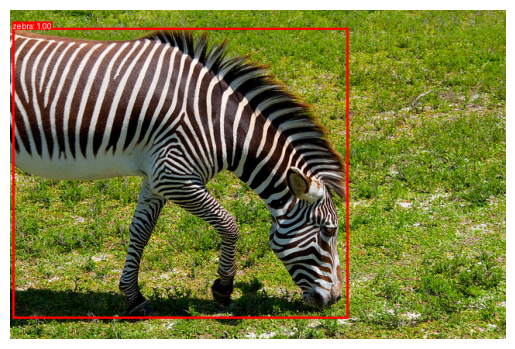

In [4]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw, ImageFont
from torchvision import transforms
import matplotlib.pyplot as plt

# Load pre-trained Faster R-CNN with FPN
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load an image
image_path = "E:\CSE41\Thesis\pytorch-fpn\giraffe.jpg"  #image path
image = Image.open(image_path).convert("RGB")

# Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    outputs = model(input_image)

# Load COCO labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Set threshold for detection confidence
threshold = 0.5

# Prepare to draw on the image
draw = ImageDraw.Draw(image)
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Path to TTF font
try:
    font = ImageFont.truetype(font_path, size=20)
except:
    font = ImageFont.load_default()  # Fallback to default font if TTF not found

# Draw predictions on the image
for i, (box, label, score) in enumerate(zip(
    outputs[0]['boxes'], outputs[0]['labels'], outputs[0]['scores']
)):
    if score.item() > threshold:  # Only consider predictions above the threshold
        box = [int(coord) for coord in box.tolist()]
        label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
        confidence = score.item()

        # Draw the bounding box
        draw.rectangle(box, outline="red", width=3)

        # Add the label and confidence score
        text = f"{label_name}: {confidence:.2f}"
        text_bbox = font.getbbox(text)  # Use getbbox() to calculate text size
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        
        # Position the text background above the bounding box
        text_location = (int(box[0]), int(max(0, box[1] - text_height)))  # Top-left corner
        text_bottom_right = (text_location[0] + int(text_width), text_location[1] + int(text_height))  # Bottom-right corner

        # Draw the background rectangle for text
        draw.rectangle(
            [text_location, text_bottom_right],
            fill="red"
        )

        # Draw the label text
        draw.text(text_location, text, fill="white", font=font)

# Display the image in the terminal using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()
